In [ ]:
import pandas as pd


ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")


ratings.head(), movies.head()

(   userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

In [ ]:

ratings.info()
movies.info()
ratings.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
print("Missing values in ratings dataset:\n", ratings.isnull().sum())
print("\nMissing values in movies dataset:\n", movies.isnull().sum())

Missing values in ratings dataset:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in movies dataset:
 movieId    0
title      0
genres     0
dtype: int64


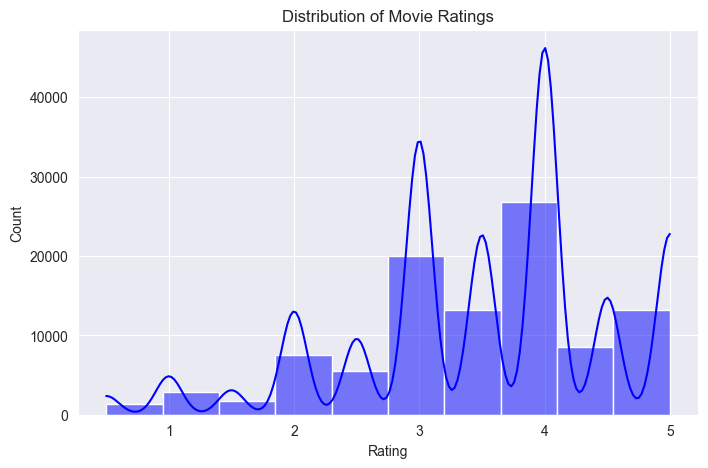

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")


plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


In [ ]:

movie_ratings_count = ratings.groupby("movieId")["rating"].count().reset_index()
movie_ratings_count.columns = ["movieId", "num_ratings"]


movies_with_ratings = movies.merge(movie_ratings_count, on="movieId")


top_movies = movies_with_ratings.sort_values(by="num_ratings", ascending=False).head(10)


top_movies[["title", "num_ratings"]]


,title,num_ratings
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278
224,Star Wars: Episode IV - A New Hope (1977),251
418,Jurassic Park (1993),238
97,Braveheart (1995),237
507,Terminator 2: Judgment Day (1991),224
461,Schindler's List (1993),220


In [ ]:

avg_movie_ratings = ratings.groupby("movieId")["rating"].mean().reset_index()
avg_movie_ratings.columns = ["movieId", "avg_rating"]


movies_with_avg_ratings = movies.merge(avg_movie_ratings, on="movieId")


popular_movies = movies_with_avg_ratings.merge(movie_ratings_count, on="movieId")
popular_movies = popular_movies[popular_movies["num_ratings"] >= 50]
top_avg_movies = popular_movies.sort_values(by="avg_rating", ascending=False).head(10)


top_avg_movies[["title", "avg_rating", "num_ratings"]]


,title,avg_rating,num_ratings
277,"Shawshank Redemption, The (1994)",4.429022,317
659,"Godfather, The (1972)",4.289062,192
2224,Fight Club (1999),4.272936,218
974,Cool Hand Luke (1967),4.271930,57
602,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,97
686,Rear Window (1954),4.261905,84
921,"Godfather: Part II, The (1974)",4.259690,129
6298,"Departed, The (2006)",4.252336,107
913,Goodfellas (1990),4.250000,126
694,Casablanca (1942),4.240000,100


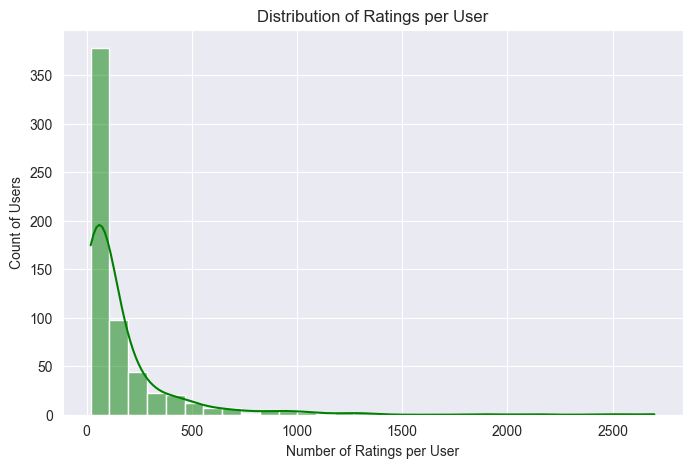

In [ ]:
user_ratings_count = ratings.groupby("userId")["rating"].count()


plt.figure(figsize=(8, 5))
sns.histplot(user_ratings_count, bins=30, kde=True, color="green")
plt.xlabel("Number of Ratings per User")
plt.ylabel("Count of Users")
plt.title("Distribution of Ratings per User")
plt.show()


In [ ]:

min_ratings = 50

popular_movies = popular_movies[popular_movies["num_ratings"] >= min_ratings]

popular_movies = popular_movies.sort_values(by=["avg_rating", "num_ratings"], ascending=[False, False])

top_popular_movies = popular_movies.head(10)

top_popular_movies[["title", "avg_rating", "num_ratings"]]


,title,avg_rating,num_ratings
277,"Shawshank Redemption, The (1994)",4.429022,317
659,"Godfather, The (1972)",4.289062,192
2224,Fight Club (1999),4.272936,218
974,Cool Hand Luke (1967),4.271930,57
602,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,97
686,Rear Window (1954),4.261905,84
921,"Godfather: Part II, The (1974)",4.259690,129
6298,"Departed, The (2006)",4.252336,107
913,Goodfellas (1990),4.250000,126
694,Casablanca (1942),4.240000,100


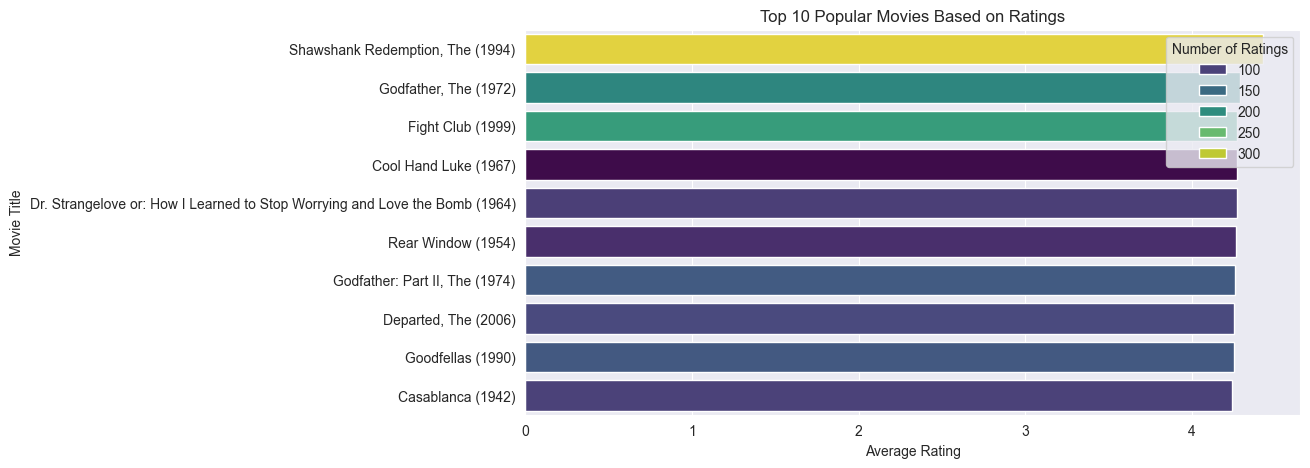

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_popular_movies["avg_rating"],
    y=top_popular_movies["title"],
    hue=top_popular_movies["num_ratings"],
    palette="viridis"
)
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Popular Movies Based on Ratings")
plt.legend(title="Number of Ratings")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

movies["genres"] = movies["genres"].fillna("")

tfidf = TfidfVectorizer(stop_words="english")

tfidf_matrix = tfidf.fit_transform(movies["genres"])

tfidf_matrix.shape  


(9742, 23)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_sim_df = pd.DataFrame(cosine_sim, index=movies["title"], columns=movies["title"])


In [ ]:
def recommend_movies(movie_title, num_recommendations=10):
    if movie_title not in cosine_sim_df.index:
        return "Movie not found in the dataset. Please try another title."

    
    similar_movies = cosine_sim_df[movie_title].sort_values(ascending=False)[1:num_recommendations+1]

    
    return similar_movies.index.tolist()


recommend_movies("Toy Story (1995)")


['Toy Story 2 (1999)',
 'Tale of Despereaux, The (2008)',
 'Asterix and the Vikings (Astérix et les Vikings) (2006)',
 'Shrek the Third (2007)',
 'Turbo (2013)',
 'Monsters, Inc. (2001)',
 'The Good Dinosaur (2015)',
 'Antz (1998)',
 "Emperor's New Groove, The (2000)",
 'Moana (2016)']

In [ ]:

user_movie_matrix = ratings.pivot(index="userId", columns="movieId", values="rating")


user_movie_matrix = user_movie_matrix.fillna(0)


user_movie_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


movie_similarity = cosine_similarity(user_movie_matrix.T)


movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)


In [ ]:
def recommend_similar_movies(movie_id, num_recommendations=10):
    if movie_id not in movie_similarity_df.index:
        return "Movie ID not found. Please try another movie."

   
    similar_movies = movie_similarity_df[movie_id].sort_values(ascending=False)[1:num_recommendations+1]

    
    recommended_movies = movies[movies["movieId"].isin(similar_movies.index)][["movieId", "title"]]

    return recommended_movies


recommend_similar_movies(1)


,movieId,title
224,260,Star Wars: Episode IV - A New Hope (1977)
314,356,Forrest Gump (1994)
322,364,"Lion King, The (1994)"
418,480,Jurassic Park (1993)
546,648,Mission: Impossible (1996)
615,780,Independence Day (a.k.a. ID4) (1996)
911,1210,Star Wars: Episode VI - Return of the Jedi (1983)
964,1265,Groundhog Day (1993)
969,1270,Back to the Future (1985)
2355,3114,Toy Story 2 (1999)


In [ ]:
import pickle

def recommend_similar_movies(movie_id, num_recommendations=10):
    movie_id = str(movie_id) 

    if movie_id not in movie_similarity_df.index:
        return "Movie ID not found. Please try another movie."

    
    similar_movies = movie_similarity_df[movie_id].sort_values(ascending=False)[1:num_recommendations+1]

    
    movies["movieId"] = movies["movieId"].astype(str)

   
    recommended_movies = movies[movies["movieId"].isin(similar_movies.index)][["movieId", "title"]]

    return recommended_movies


print(recommend_similar_movies(1))


with open("movie_similarity.pkl", "wb") as f:
    pickle.dump(movie_similarity_df, f)
print("✅ Model saved as 'movie_similarity.pkl'")


Movie ID not found. Please try another movie.
✅ Model saved as 'movie_similarity.pkl'
